In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## SELLING PRICE IS OUR TARGET

In [5]:
df= pd.read_csv("car data.csv")

In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [34]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,0.053643,-0.039896,-0.000394,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,0.509467,-0.550724,0.367128,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.440415,-0.512030,0.348715,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.166801,-0.101419,0.162510,0.089216
Fuel_Type,0.053643,0.509467,0.440415,0.166801,1.000000,-0.352415,0.080466,-0.055705
Seller_Type,-0.039896,-0.550724,-0.512030,-0.101419,-0.352415,1.000000,-0.063240,0.124269
Transmission,-0.000394,0.367128,0.348715,0.162510,0.080466,-0.063240,1.000000,0.050316
Owner,-0.182104,-0.088344,0.008057,0.089216,-0.055705,0.124269,0.050316,1.000000


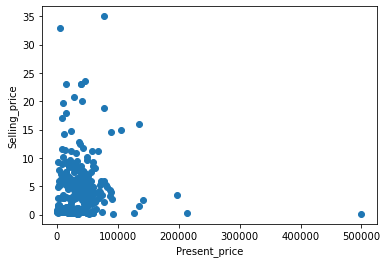

In [44]:
plt.scatter(df["Kms_Driven"],df["Selling_Price"])
plt.xlabel("Present_price")
plt.ylabel("Selling_price")
plt.show()

In [7]:
df.describe() # This is showing only integer type of data.

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
# checking no of rows and columns
df.shape

(301, 9)

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
# checking the distribution of categorical data

print(df.Fuel_Type.value_counts()) # No values on a particular category
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [12]:
# Changing categorical to integer format

df.replace({"Fuel_Type":{"Petrol" : 0, "Diesel" : 1, "CNG" : 2}},inplace = True)
df.replace({"Seller_Type":{"Dealer" : 0, "Individual" : 1}},inplace = True)
df.replace({"Transmission":{"Manual" : 0, "Automatic" : 1}},inplace = True)

In [13]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [14]:
# Splitting data and target X IS FEATURES AND Y IS FOR TAGET

x = df.drop(["Car_Name","Selling_Price"],axis=1)
y = df["Selling_Price"]


In [15]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [16]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [17]:
# Splitting and training and test data

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.1,random_state =2)

In [18]:
X_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
204,2015,4.430,28282,0,0,0,0
249,2016,7.600,17000,0,0,0,0
277,2015,13.600,21780,0,0,0,0
194,2008,0.787,50000,0,1,0,0
244,2013,9.400,49000,1,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.800,36000,0,0,0,0
22,2011,8.010,50000,0,0,1,0
72,2013,18.610,56001,0,0,0,0
15,2016,10.790,43000,1,0,0,0


In [19]:
y_train

204    2.75
249    5.25
277    9.70
194    0.20
244    5.95
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 270, dtype: float64

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train,y_train)

LinearRegression()

In [22]:
print(regression.coef_)

[ 4.09426126e-01  4.38728846e-01 -6.73100388e-06  1.76308349e+00
 -1.00417660e+00  1.50736348e+00 -8.74133473e-01]


In [23]:
print(regression.intercept_)

-823.0159622159742


In [24]:
#prediction on training data
reg_pred = regression.predict(X_train)
reg_pred

array([ 3.73088505e+00,  5.60702081e+00,  7.79779356e+00, -1.88374756e+00,
        6.71614572e+00,  8.14343296e+00,  5.84067525e+00,  6.17919527e+00,
        6.15863751e+00,  1.59459051e+01,  2.15385926e+00,  1.11618544e+00,
       -4.05463414e-01,  6.69051516e+00,  6.81961414e+00,  1.02957394e+00,
        6.74306974e+00,  1.43864300e+01,  3.00001893e+00,  7.95149024e+00,
       -8.38569413e-01,  9.02067892e+00,  1.21210550e+00,  2.20040027e+00,
       -8.23744275e-01,  7.52651502e-01,  1.00142469e+01, -4.08950275e-01,
       -2.40418357e+00,  9.99845989e+00,  6.81867179e+00,  1.09249928e+00,
        4.36158792e+00,  9.20660480e-02,  3.48993776e+00,  2.78147834e+00,
        1.50401026e+00,  4.65736158e-01,  1.68679810e+00,  1.18722506e+00,
        4.32936153e+00,  6.09932798e+00,  9.51639926e-01,  7.52875828e-01,
        6.05967594e+00,  3.49453005e+00,  2.40969246e+00,  7.52230513e+00,
        4.63113915e+00,  4.44239322e+00,  4.22460259e+00,  2.71077171e+00,
        4.46881874e+00,  

In [25]:
# R2 error on training data
error = metrics.r2_score(y_train,reg_pred)
print(error)

0.87994516604937


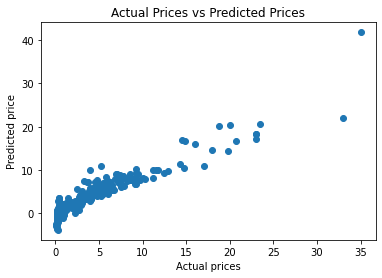

In [26]:
# visualize the actual prices and preidcted prices
plt.scatter(y_train,reg_pred)
plt.xlabel("Actual prices")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [29]:
# Prediction on test data
test_data_prediction = regression.predict(X_test)
test_data_prediction

array([10.32892855,  0.77165673,  4.26482324,  4.78985002,  9.88701568,
        4.24823193,  6.92536953,  7.29321065,  0.21950514,  5.18527582,
        6.23823964,  6.07761019,  2.1716932 ,  7.77611973,  1.89987958,
        1.79635895,  2.10001123,  1.91953211,  9.24977006,  4.25291486,
        1.569912  ,  9.04949049,  1.52561157,  9.65418587,  0.89631315,
        7.99187626,  1.59929505, -3.17680912,  4.24653988,  2.1257015 ,
        3.49654935])

In [30]:
# R2 error on test data
error = metrics.r2_score(y_test,test_data_prediction)
print(error)

0.8365766715025409


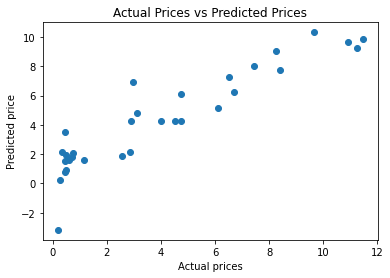

In [31]:
plt.scatter(y_test,test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()